<a href="https://colab.research.google.com/github/F-Hilal/titanic-project/blob/main/PROJE_%C3%96DEV%C4%B0_1_TITANIC_YOLCU_VER%C4%B0_SET%C4%B0_ANAL%C4%B0Z%C4%B0_Fatma_Hilal_AK%C3%87AY.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### **Adım 1️: Veri Yükleme ve İlk İnceleme:**

Veri setimizi Pandas ile Github sitesindeki linkten raw dosyası olarak import edip veri setimizi inceleyelim.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# GitHub'daki raw CSV linki
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

# Veri setininin okunması
df = pd.read_csv(url)

#İlk 5 satırın gösterimi
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


**Kod Açıklaması:**

 * pd.read_csv(url) ile veri setini okutup, df.head() ile ilk 5 satırı görüntüledik.

 * Veri seti 12 sütundan oluşuyor. Bu sütun başlıklarının Türkçe anlamları:

   - **PassengerId**: Yolcu kimlik numarası
   - **Survived**: Hayatta kalma durumu (0: Hayatta değil, 1: Hayatta)
   - **Pclass**: Yolcu sınıfı (1: Birinci, 2: İkinci, 3: Üçüncü)
   - **Name**: İsim
   - **Sex**: Cinsiyet
   - **Age**: Yaş
   - **SibSp**: Gemideki kardeş/eş sayısı
   - **Parch**: Gemideki ebeveyn/çocuk sayısı
   - **Ticket**: Bilet numarası
   - **Fare**: Bilet ücreti
   - **Cabin**: Kabin numarası
   - **Embarked**: Gemiye biniş limanı

In [ ]:
# Veri tipleri uygunluğu kontrolü
print(df.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [ ]:
df["PassengerId"] = df["PassengerId"].astype("object")

#Veri tipini tekrar kontrol edelim
print(df.dtypes)

PassengerId     object
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


**Kod Açıklaması:**

**PassengerId** sütununun veri tipi **object** türüne çevrildi.
Çünkü "Yolcu kimlik numarası" sütunun sayısal veri olması ve istatistik işlemlerinin yapılması mantıklı değildir.

Tüm sütunların veri tipi kontrol edildi ve uygun olduğu görüldü.





---


### **Adım 2️ : Veri Temizleme ve Düzenleme:**

In [ ]:
# Eksik değer kontrolü
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


**Çıktı Açıklaması:**

Veri setinde bazı sütunlarda eksik değerler mevcuttur:

Age sütununda 177, Cabin sütununda 687 ve Embarked sütununda 2 eksik değer bulunmaktadır.

In [ ]:
# Eksik Age değerleri medyan ile dolduruldu
df['Age'] = df['Age'].fillna(df['Age'].median())

# Eksik Cabin değerleri 'Bilinmiyor' ile değiştirildi
df['Cabin'] = df['Cabin'].fillna('Bilinmiyor')

# Eksik Embarked değerleri en sık görülen liman ile dolduruldu
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

print(df.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


**Kod Açıklaması:**
* Yaş sütununda, 177 eksik veri uç değerlerden etilenmemek için medyan ile dolduruldu.

* Cabin sütununda, 687 eksik veri bilinmiyor ile değiştirildi.

* Embarked sütununda, 2 eksik veri en sık tekrar eden liman ile dolduruldu.



---


### **Adım 3️: Keşifsel Veri Analizi (EDA):**

In [ ]:
# Hayatta kalan yolcuların yüzdesi
hayatta_kalan = df["Survived"].mean() * 100
print(f"Hayatta kalan: {hayatta_kalan:.2f}")

# Cinsiyete göre ortalama yaşlar
cinsiyet_yas = df.groupby("Sex")["Age"].mean()
print(cinsiyet_yas)

# Farklı yolcu sınıflarındaki hayatta kalma oranları
sinif_bazinda = df.groupby("Pclass")["Survived"].mean() * 100
print(sinif_bazinda)

Hayatta kalan: 38.38
Sex
female    27.929936
male      30.140676
Name: Age, dtype: float64
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64


**Çıktı Açıklaması:**

* Yolcuların % 38'i hayatta kalmış. (Yaklaşık 3’te 1’i).

* Kadın yolcular erkeklere göre biraz daha genç. Ancak bu fark çok büyük değil.

* **Sınıf yükseldikçe hayatta kalma oranı da artıyor.**

  * Bunun sebebi:

   1.sınıf yolcular geminin üst güvertelerine yakın yerleşmişti → filikalara ulaşma şansları daha yüksekti.

   3.sınıf yolcular alt güvertelerdeydi → tahliye sırasında daha dezavantajlıydılar.




---


### **Adım 4️: Veri Görselleştirme:**


In [ ]:
# ortalama değer → hayatta kalma oranı
h_kalan = df.groupby("Sex")["Survived"].mean()
print(h_kalan)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


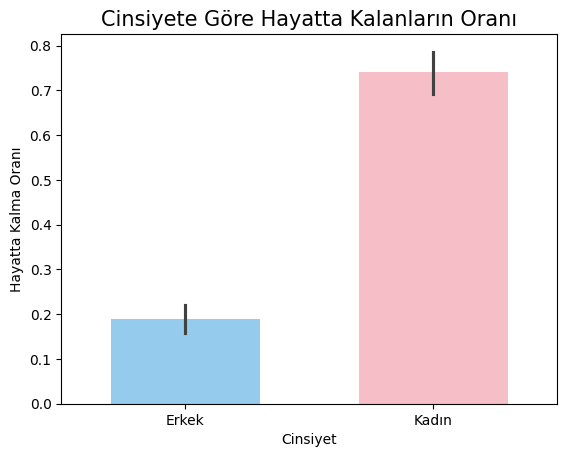

In [ ]:
# Cinsiyete göre hayatta kalma oranının bar grafiği
sns.barplot(x='Sex', y='Survived', data=df, width=0.6, hue = 'Sex',
            palette={'male': '#87CEFA', 'female': '#FFB6C1'})
plt.title("Cinsiyete Göre Hayatta Kalanların Oranı", fontsize=15)
plt.xlabel("Cinsiyet")
plt.ylabel("Hayatta Kalma Oranı")
plt.xticks([0, 1], ["Erkek", "Kadın"])

plt.show()

**Çıktı Açıklaması:**

* Erkeklerin hayatta kalma oranı ≈ %19

* Kadınların hayatta kalma oranı ≈ %74

Kadınların kurtulma oranı, erkeklerin yaklaşık 4 katı. Bu fark, gemide uygulanan "önce kadınlar ve çocuklar" prensibinin bir sonucudur. Dolayısıyla, cinsiyet hayatta kalmayı açıklayan en güçlü değişkenlerden biridir.


---



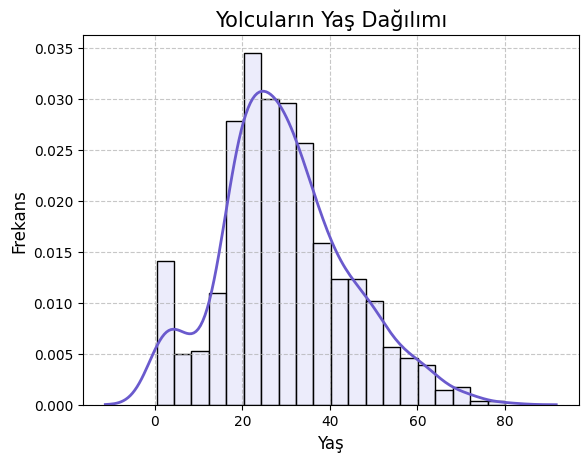

In [ ]:
# Yaş dağılımı histogramı
sns.histplot(df['Age'], bins=20, color='#E6E6FA', stat='density')
plt.title("Yolcuların Yaş Dağılımı", fontsize=15)
plt.xlabel('Yaş', fontsize=12)
plt.ylabel('Frekans', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
sns.kdeplot(df['Age'], color='#6A5ACD', linewidth=2)
plt.show()

**Çıktı Açıklaması:**

Yolcuların çoğu 20-40 yaş aralığında.


---



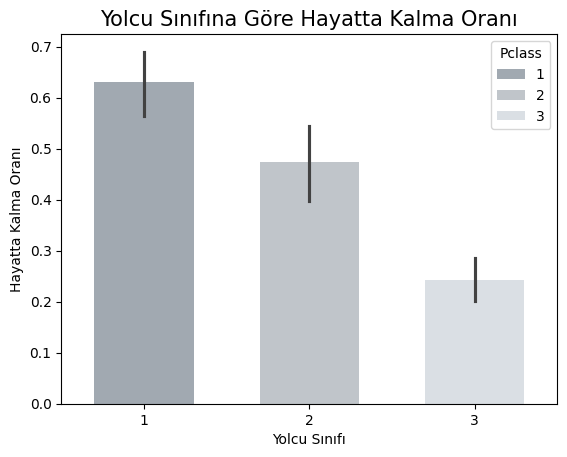

In [5]:
# Yolcu sınıfına göre hayatta kalma oranları
sns.barplot(x="Pclass", y="Survived", data=df, width=0.6, hue = 'Pclass',
            palette={1: '#9ea9b4', 2: '#bec5cc', 3: '#d8dfe6'})
plt.title("Yolcu Sınıfına Göre Hayatta Kalma Oranı", fontsize=15)
plt.xlabel("Yolcu Sınıfı")
plt.ylabel("Hayatta Kalma Oranı")

plt.show()

**Çıktı Açıklaması:**

Grafikte yolcu sınıfı düştükçe hayatta kalma oranının da azaldığı görülüyor .



---


### **Adım 5️: Hayatta Kalmayı Etkileyen Faktörlerin Analizi:**

In [ ]:
# Yaş ile hayatta kalma arasındaki Pearson korelasyonunu hesaplıyoruz
correlation = df['Age'].corr(df['Survived'])
print(f"Yaş ve hayatta kalma arasındaki Pearson korelasyonu: {correlation:.3f}")

Yaş ve hayatta kalma arasındaki Pearson korelasyonu: -0.077


**Çıktı Açıklaması:**

-0.077 → çok zayıf negatif ilişki demektir.

Negatif olması → yaş arttıkça hayatta kalma olasılığı biraz azalma eğiliminde, ama -0.077 gibi küçük bir değer, bu ilişki ihmal edilebilir düzeyde, yani neredeyse ilişki yok.

In [ ]:
# Bilet ücreti ile hayatta kalma arasındaki Pearson korelasyonunu hesaplıyoruz
iliski = df['Fare'].corr(df['Survived'])
print(f"Bilet ücreti ve hayatta kalma arasındaki Pearson korelasyonu: {iliski:.3f}")

Bilet ücreti ve hayatta kalma arasındaki Pearson korelasyonu: 0.257


**Çıktı Açıklaması:**

Pozitif bir değer → Bilet ücreti arttıkça hayatta kalma olasılığı artıyor demektir.

0.257 → zayıf-orta düzeyde pozitif ilişki. Çok yüksek bir değer değil, bu nedenle tek başına bilet ücreti hayatta kalmayı güçlü şekilde açıklamıyor.



---


### **Adım 6: Sonuçları Raporlama:**

**1) Genel Hayatta Kalma Durumu**

* Titanic’teki yolcuların yaklaşık %38’i hayatta kalmıştır.

* Yani genel hayatta kalma oranı oldukça düşüktür.

**2) Cinsiyet Faktörü**

* Erkeklerin hayatta kalma oranı ≈ %19

* Kadınların hayatta kalma oranı ≈ %74

  **Kadınlar**, Titanic kazasında hayatta kalma açısından **en belirleyici faktörlerden biri** olmuştur.

**3) Yolcu Sınıfı**

* 1.sınıf yolcuların hayatta kalma oranı: %63

* 2.sınıf yolcuların hayatta kalma oranı: %47

* 3.sınıf yolcuların hayatta kalma oranı: %24

  **Yolcu sınıfı**, hayatta kalmayı etkileyen **çok güçlü bir faktördür**. Üst sınıf yolcular daha iyi imkanlara sahipti ve hayatta kalma şansı daha yüksekti.

**4) Yaş Faktörü**

* Yaş ve hayatta kalma arasındaki Pearson korelasyonu: -0.077

* Yani yaş ile hayatta kalma arasında çok zayıf bir negatif ilişki var.

  Yaş, hayatta kalmayı açıklamada tek başına güçlü bir faktör değil, ancak küçük çocukların kurtulma olasılığı biraz daha yüksek olabilir.

**5) Bilet Ücreti**

* Bilet ücreti ile hayatta kalma arasındaki Pearson korelasyonu: 0.257

* Daha pahalı biletler genellikle 1. sınıf yolcularına ait olduğu için, bilet ücreti dolaylı olarak hayatta kalmayı düşük de olsa etkileyen bir faktördür.



---



**Özet - Hayatta Kalmayı Etkileyen En Önemli Faktörler**

**Cinsiyet** → **Kadınların** hayatta kalma şansı çok daha **yüksek**.

**Yolcu Sınıfı**→ **1. sınıf** yolcuların hayatta kalma olasılığı **en yüksek**.

**Bilet Ücreti** → Ücret arttıkça hayatta kalma olasılığı artıyor (dolaylı etkili).

**Yaş** → Çok zayıf etkili, tek başına belirleyici değil.

**Genel Yorum:**

**Titanic kazasında hayatta kalma şansını belirleyen en güçlü faktörler cinsiyet ve yolcu sınıfıdır**.

Yaş ve bilet ücreti ise ikinci derecede etkili faktörlerdir.
